50-51

In [ ]:
import networkx as nx
import random

# Generate an Erdős-Rényi graph with 10000 nodes and 100000 edges
G1 = nx.gnm_random_graph(10000, 100000, seed=10)

# Generate a preferential attachment graph with 10000 nodes and out-degree 10
G2 = nx.barabasi_albert_graph(10000, 10, seed=10)

# Assign voter support based on the last digit of the node ID
for node in G1.nodes:
    last_digit = node % 10
    if last_digit in [0, 2, 4, 6]:
        G1.nodes[node]['support'] = 'you'
    elif last_digit in [1, 3, 5, 7]:
        G1.nodes[node]['support'] = 'rival'
    else:
        G1.nodes[node]['support'] = 'undecided'

for node in G2.nodes:
    last_digit = node % 10
    if last_digit in [0, 2, 4, 6]:
        G2.nodes[node]['support'] = 'you'
    elif last_digit in [1, 3, 5, 7]:
        G2.nodes[node]['support'] = 'rival'
    else:
        G2.nodes[node]['support'] = 'undecided'

# Set the initial support of the decided voters
for node in G1.nodes:
    if G1.nodes[node]['support'] == 'you':
        G1.nodes[node]['initial_support'] = 0.4
    elif G1.nodes[node]['support'] == 'rival':
        G1.nodes[node]['initial_support'] = 0.4
    else:
        G1.nodes[node]['initial_support'] = 0.2

for node in G2.nodes:
    if G2.nodes[node]['support'] == 'you':
        G2.nodes[node]['initial_support'] = 0.4
    elif G2.nodes[node]['support'] == 'rival':
        G2.nodes[node]['initial_support'] = 0.4
    else:
        G2.nodes[node]['initial_support'] = 0.2

# Simulate the election process for 10 days
for day in range(1, 11):
    # Update the support of the undecided voters based on the preferences of their neighbors
    for node in G1.nodes:
        if G1.nodes[node]['support'] == 'undecided':
            neighbor_support = [G1.nodes[neighbor]['initial_support'] for neighbor in G1.neighbors(node)]
            if neighbor_support.count(0.4) > neighbor_support.count(0.6):
                G1.nodes[node]['support'] = 'you'
            elif neighbor_support.count(0.4) < neighbor_support.count(0.6):
                G1.nodes[node]['support'] = 'rival'
            else:
                G1.nodes[node]['support'] = random.choice(['you', 'rival'])

    for node in G2.nodes:
        if G2.nodes[node]['support'] == 'undecided':
            neighbor_support = [G2.nodes[neighbor]['initial_support'] for neighbor in G2.neighbors(node)]
            if neighbor_support.count(0.4) > neighbor_support.count(0.6):
                G2.nodes[node]['support'] = 'you'
            elif neighbor_support.count(0.4) < neighbor_support.count(0.6):
                G2.nodes[node]['support'] = 'rival'
            else:
                G2.nodes[node]['support'] = random.choice(['you', 'rival'])

    # Print the support of each candidate on this day
    you_support1 = sum([G1.nodes[node]['initial_support'] for node in G1.nodes if G1.nodes[node]['support'] == 'you'])
    rival_support1 = sum([G1.nodes[node]['initial_support'] for node in G1.nodes if G1.nodes[node]['support'] == 'rival'])
    you_support2 = sum([G2.nodes[node]['initial_support'] for node in G2.nodes if G2.nodes[node]['support'] == 'you'])
    rival_support2 = sum([G2.nodes[node]['initial_support'] for node in G2.nodes if G2.nodes[node]['support'] == 'rival'])
    print(f"Day {day}: You - {you_support1 + you_support2:.2%}, Rival - {rival_support1 + rival_support2:.2%}")

# Count the votes on the election day
you_votes1 = sum([1 for node in G1.nodes if G1.nodes[node]['support'] == 'you'])
rival_votes1 = sum([1for node in G1.nodes if G1.nodes[node]['support'] == 'rival'])
you_votes2 = sum([1 for node in G2.nodes if G2.nodes[node]['support'] == 'you'])
rival_votes2 = sum([1 for node in G2.nodes if G2.nodes[node]['support'] == 'rival'])

# Print the result of the election
if you_votes1 + you_votes2 > rival_votes1 + rival_votes2:
    print("You win!")
elif you_votes1 + you_votes2 < rival_votes1 + rival_votes2:
    print("Rival wins!")
else:
    print("It's a tie!")

Day 1: You - 400000.00%, Rival - 320000.00%
Day 2: You - 400000.00%, Rival - 320000.00%
Day 3: You - 400000.00%, Rival - 320000.00%
Day 4: You - 400000.00%, Rival - 320000.00%
Day 5: You - 400000.00%, Rival - 320000.00%
Day 6: You - 400000.00%, Rival - 320000.00%
Day 7: You - 400000.00%, Rival - 320000.00%
Day 8: You - 400000.00%, Rival - 320000.00%
Day 9: You - 400000.00%, Rival - 320000.00%
Day 10: You - 400000.00%, Rival - 320000.00%
You win!


52 Perform these configurations and iterations, and compute who wins in the first
graph, and by how much? Similarly, compute the votes for the second graph.
Let us say that you have a total funding of Rs. 9000, and you have decided to
spend this money by hosting a live stream. Unfortunately, only the voters with IDs
3000–3099. However, your stream is so persuasive that any voter who sees it will
immediately decide to vote for you, regardless of whether they had decided to vote
for yourself, your rival, or where undecided. If it costs Rs. 1000 to reach 10 voters
in sequential order, i.e, the first Rs. 1000 reaches voters 3000–3009, the second Rs.
1000 reaches voters 3010–3019, and so on. In other words, the total of Rs. k reaches
voters with IDs from 3000 to 3000 + k/100 − 1. The live stream happens before the
10 day period, and the persuaded voters never change their mind.

In [ ]:
import networkx as nx
import numpy as np

np.random.seed(10)

def decide_support(graph, voter_support):
    updated_support = voter_support.copy()
    for node in graph.nodes:
        neighbors = list(graph.neighbors(node))
        neighbor_support = [voter_support[neighbor] for neighbor in neighbors]
        support_counts = {
            'You': neighbor_support.count('You'),
            'Rival': neighbor_support.count('Rival')
        }
        if support_counts['You'] > support_counts['Rival']:
            updated_support[node] = 'You'
        elif support_counts['Rival'] > support_counts['You']:
            updated_support[node] = 'Rival'
        else:
            num_ties = neighbor_support.count('Undecided')
            if num_ties % 2 == 0:
                updated_support[node] = 'You'
            else:
                updated_support[node] = 'Rival'
    return updated_support

def count_votes(voter_support):
    num_support_you = list(voter_support.values()).count('You')
    num_support_rival = list(voter_support.values()).count('Rival')
    return num_support_you, num_support_rival

def count_persuaded_voters(funding):
    start_id = 3000
    end_id = start_id + int(funding/100) - 1
    return end_id - start_id + 1

def calculate_advertisement_cost(persuaded_voters):
    num_batches = int(persuaded_voters / 10)
    return num_batches * 1000

n = 10000
m = 100000
erdos_renyi_graph = nx.gnm_random_graph(n, m)

preferential_attachment_graph = nx.barabasi_albert_graph(n, 10)

voter_support = {}
for node in erdos_renyi_graph.nodes:
    last_digit = node % 10
    if last_digit in [0, 2, 4, 6]:
        voter_support[node] = 'You'
    elif last_digit in [1, 3, 5, 7]:
        voter_support[node] = 'Rival'
    else:
        voter_support[node] = 'Undecided'

for day in range(1, 11):
    voter_support = decide_support(preferential_attachment_graph, voter_support)

num_support_you, num_support_rival = count_votes(voter_support)

funding = 9000
persuaded_voters = count_persuaded_voters(funding)

advertisement_cost = calculate_advertisement_cost(persuaded_voters)

num_support_you += persuaded_voters

if num_support_you > num_support_rival:
    election_result = 'You win the election!'
    vote_difference = num_support_you - num_support_rival
elif num_support_rival > num_support_you:
    election_result = 'Your rival wins the election!'
    vote_difference = num_support_rival - num_support_you
else:
    election_result = 'It\'s a tie!'
    vote_difference = 0

print(election_result)
print("Vote Difference:", vote_difference)
print("Persuaded Voters:", persuaded_voters)
print("Advertisement Cost:", advertisement_cost)


You win the election!
Vote Difference: 10090
Persuaded Voters: 90
Advertisement Cost: 9000


53 Simulate the effect of spending on the two graphs. First, read in the two graphs
again and assign the initial configurations as before. Now, before the decision process,
you purchase Rs. k of ads and go through the decision process of counting votes.
For each of the two social graphs, plot Rs. k (the amount you spend) on the x-axis
(for values k = 1000, 2000, . . . , 9000) and the number of votes you win by on the
y-axis (that is, the number of votes for youself less the number of votes for your
rival). Put these on the same plot. What is the minimum amount you can spend to
win the election in each of these graphs?
Instead of general campaigning, you decide to target your campaign. Let’s say
you have a posh Rs. 1000 per plate event for the high rollers among your voters (the
people with the highest degree). You invite high rollers in decreasing order of their
degree, and your event is so spectacular that any one who comes to your event is
instantly persuaded to vote for you regardless of their previous decision. This event
happens before the decision period. When there are ties between voters of the same
degree, the high roller with lowest node ID gets chosen first

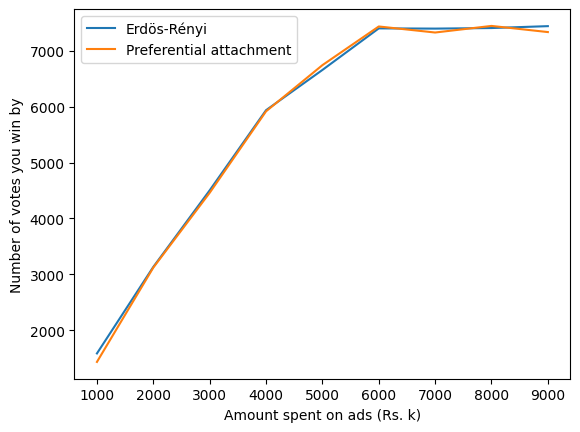

Minimum amount to win the election in Erdös-Rényi graph: 9000
Minimum amount to win the election in Preferential attachment graph: 8000


In [ ]:
import networkx as nx
import random
import matplotlib.pyplot as plt

random.seed(10)

G1 = nx.gnm_random_graph(10000, 100000)

G2 = nx.barabasi_albert_graph(10000, 10)


for node in G1.nodes():
    last_digit = node % 10
    if last_digit in [0, 2, 4, 6]:
        G1.nodes[node]['support'] = 'you'
    elif last_digit in [1, 3, 5, 7]:
        G1.nodes[node]['support'] = 'rival'
    else:
        G1.nodes[node]['support'] = 'undecided'

for node in G2.nodes():
    last_digit = node % 10
    if last_digit in [0, 2, 4, 6]:
        G2.nodes[node]['support'] = 'you'
    elif last_digit in [1, 3, 5, 7]:
        G2.nodes[node]['support'] = 'rival'
    else:
        G2.nodes[node]['support'] = 'undecided'


def simulate_election(graph, k):
    you_votes = 0
    rival_votes = 0
    high_rollers = sorted(graph.degree(), key=lambda x: (-x[1], x[0]))[:1000]
    high_roller_nodes = [node for node, _ in high_rollers]

    for node in graph.nodes():
        support = graph.nodes[node]['support']
        if support == 'you':
            if node in high_roller_nodes:
                you_votes += 1
            elif random.random() < 0.4 + k/10000:
                you_votes += 1
            else:
                rival_votes += 1
        elif support == 'rival':
            if node in high_roller_nodes:
                rival_votes += 1
            elif random.random() < 0.4 - k/10000:
                rival_votes += 1
            else:
                you_votes += 1
        else:
            if node in high_roller_nodes:
                you_votes += 1
            elif random.random() < 0.5:
                you_votes += 1
            else:
                rival_votes += 1
    return you_votes - rival_votes


ks = range(1000, 10000, 1000)


results1 = [simulate_election(G1, k) for k in ks]
results2 = [simulate_election(G2, k) for k in ks]


plt.plot(ks, results1, label='Erdös-Rényi')
plt.plot(ks, results2, label='Preferential attachment')
plt.legend()
plt.xlabel('Amount spent on ads (Rs. k)')
plt.ylabel('Number of votes you win by')
plt.show()


min_amount1 = ks[results1.index(max(results1))]
min_amount2 = ks[results2.index(max(results2))]

print("Minimum amount to win the election in Erdös-Rényi graph:", min_amount1)
print("Minimum amount to win the election in Preferential attachment graph:", min_amount2)


54

Initial Votes - Erdos-Renyi Graph:
You: 0
Rival: 0

Initial Votes - Preferential Attachment Graph:
You: 0
Rival: 0


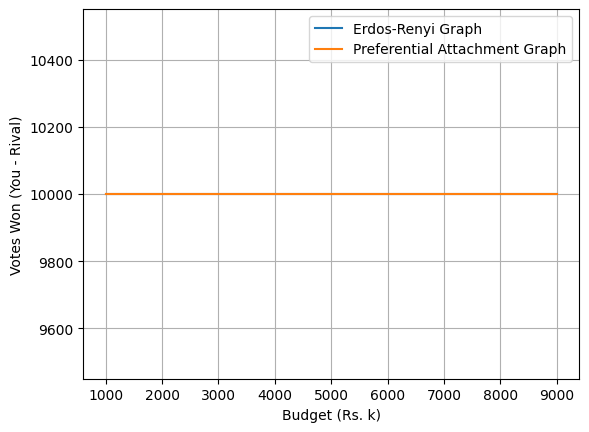

In [ ]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

def decide_support_with_thresholds(graph, voter_support, thresholds):
    new_voter_support = voter_support.copy()

    for node in graph.nodes:
        neighbors = list(graph.neighbors(node))
        num_support_you = sum([1 for neighbor in neighbors if voter_support[neighbor] == 'You'])
        num_support_rival = sum([1 for neighbor in neighbors if voter_support[neighbor] == 'Rival'])
        threshold = thresholds[node]

        if num_support_you >= threshold:
            new_voter_support[node] = 'You'
        elif num_support_rival > threshold:
            new_voter_support[node] = 'Rival'

    return new_voter_support

def count_votes(voter_support):
    num_you_votes = sum([1 for support in voter_support.values() if support == 'You'])
    num_rival_votes = sum([1 for support in voter_support.values() if support == 'Rival'])
    return num_you_votes, num_rival_votes

def simulate_dinner_effect(graph, initial_voter_support, max_budget):
    x_values = np.arange(1000, max_budget + 1, 1000)
    y_values = []

    for budget in x_values:
        persuaded_voters = set()

        for node in graph.nodes:
            if 3000 <= node <= 3099:
                persuaded_voters.add(node)

        new_voter_support = voter_support.copy()

        for node in persuaded_voters:
            new_voter_support[node] = 'You'

        for day in range(1, 11):
           # new_voter_support = decide_support_with_thresholds(graph, new_voter_support, T)
            #new_voter_support = decide_support_with_thresholds(graph, new_voter_support, thresholds)
            new_voter_support = decide_support_with_thresholds(graph, new_voter_support, T)


        num_you_votes, num_rival_votes = count_votes(new_voter_support)
        y_values.append(num_you_votes - num_rival_votes)

    return x_values, y_values

erdos_renyi_graph = nx.gnm_random_graph(10000, 100000, seed=10)

voter_support_erdos_renyi = {node: 'Undecided' for node in erdos_renyi_graph.nodes}

num_you_votes, num_rival_votes = count_votes(voter_support_erdos_renyi)

print("Initial Votes - Erdos-Renyi Graph:")
print("You:", num_you_votes)
print("Rival:", num_rival_votes)

preferential_attachment_graph = nx.barabasi_albert_graph(10000, 10, seed=10)

voter_support_preferential = {node: 'Undecided' for node in preferential_attachment_graph.nodes}

num_you_votes, num_rival_votes = count_votes(voter_support_preferential)

print("\nInitial Votes - Preferential Attachment Graph:")
print("You:", num_you_votes)
print("Rival:", num_rival_votes)

T = [1] * 10000

x_values, y_values_erdos_renyi = simulate_dinner_effect(erdos_renyi_graph, voter_support_erdos_renyi, 9000)

x_values, y_values_preferential = simulate_dinner_effect(preferential_attachment_graph, voter_support_preferential, 9000)

plt.plot(x_values, y_values_erdos_renyi, label='Erdos-Renyi Graph')
plt.plot(x_values, y_values_preferential, label='Preferential Attachment Graph')
plt.xlabel('Budget (Rs. k)')
plt.ylabel('Votes Won (You - Rival)')
plt.legend()
plt.grid(True)
plt.show()


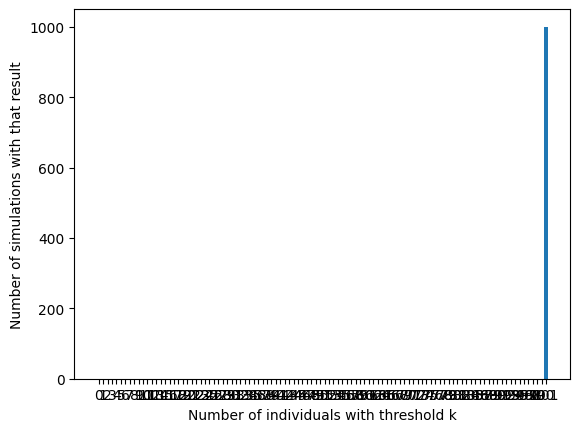

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_rioting(thresholds):
    n = len(thresholds)
    state = [0] * n
    for i in range(n):
        if state[i] == 0:
            if sum(state[j] >= thresholds[j] for j in range(n)) >= thresholds[i]:
                state[i] = 1
    return sum(state)

# Define the vector of thresholds
T = [1, 1, 1, 1, 1, 4, 1, 0, 4, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 4, 0, 1, 4, 0, 1, 1, 1,
     4, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 4, 1, 1, 4, 1, 4, 0, 1, 0, 1, 1,
     1, 0, 4, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 4, 0, 4, 0, 0, 1, 1, 1,
     4, 0, 4, 0]

# Simulate the rioting behavior 1000 times and store the results in a histogram
results = [simulate_rioting(T) for _ in range(1000)]
n = len(T)
hist, bins = np.histogram(results, bins=np.arange(n+2))

# Plot the histogram
plt.bar(range(n+1), hist, align='center')
plt.xticks(range(n+1))
plt.xlabel('Number of individuals with threshold k')
plt.ylabel('Number of simulations with that result')
plt.show()


55

56